# CURRENT QUIVER PLOT

In [47]:
#import library
import os
os.environ['PROJ_LIB'] = r'C:/Users/user/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
import matplotlib.pyplot as plt
from   netCDF4 import *

# Input Data Arus

In [48]:
#salin path tempat penyimpanan data 
fn='C:/Users/USER/Documents/andat/praktikum 1b/Data Arus.nc4' #contoh
#melihat informasi dari dataset yang didonwload
ds=nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_19.1/2005; Translation Date = 2021-11-01T11:50:33.063Z
    geospatial_lat_min: -8.479999542236328
    geospatial_lat_max: -3.5199999809265137
    geospatial_lon_min: 124.3199462890625
    geospatial_lon_max: 131.280029296875
    dimensions(sizes): time(31), depth(1), lat(63), lon(88)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int

## Deklarasi Data Arus
data arus yang digunakan dalam plot quiver merupakan data spasial, jadi gausah diambil di grid tertentu

In [49]:
u10=ds.variables['water_u'][0,0,:,:] 
v10=ds.variables['water_v'][0,0,:,:]
lon=ds.variables['lon'][:]
lat=ds.variables['lat'][:]
time=ds.variables['time'][:]

var = np.sqrt(abs(u10*u10) + (v10*v10))

#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u10))
print('dimensi v',np.shape(v10))
print('dimensi lon',np.shape(lon))
print('dimensi lat',np.shape(lat))
print('dimensi time',np.shape(time))

dimensi u (63, 88)
dimensi v (63, 88)
dimensi lon (88,)
dimensi lat (63,)
dimensi time (31,)


In [50]:
u, lonsout = addcyclic(u10, lon)
v, lonsout = addcyclic(v10, lon)
print ("lon[0]: ", lonsout[0], "lon[-1]: ", lonsout[-1])
print ("lat[0]: ", lat[0], "lat[-1]: ", lat[-1])

lonsout2=(lonsout[:(len(lonsout)-1)]) #memotong 1 data

print (lonsout2[:])
print (lat[:])
#cek dulu lon dan lat nya naik dari kecil ke besar engga, kalo misalnya belom ditambah begini
#lat2= lat[::-1] atau lonsout3=lonsout2[::-1] gitudeh terus dibawah jangan lupa diubah juga waktu plot quiver 

lon[0]:  124.3199462890625 lon[-1]:  124.3199462890625
lat[0]:  -8.479999542236328 lat[-1]:  -3.5199999809265137
[124.31994629 124.40002441 124.47998047 124.56005859 124.64001465
 124.7199707  124.80004883 124.88000488 124.95996094 125.04003906
 125.11999512 125.19995117 125.2800293  125.35998535 125.43994141
 125.52001953 125.59997559 125.68005371 125.76000977 125.83996582
 125.92004395 126.         126.07995605 126.16003418 126.23999023
 126.31994629 126.40002441 126.47998047 126.56005859 126.64001465
 126.7199707  126.80004883 126.88000488 126.95996094 127.04003906
 127.11999512 127.19995117 127.2800293  127.35998535 127.43994141
 127.52001953 127.59997559 127.68005371 127.76000977 127.83996582
 127.92004395 128.         128.07995605 128.16003418 128.23999023
 128.32006836 128.40002441 128.47998047 128.56005859 128.64001465
 128.7199707  128.80004883 128.88000488 128.95996094 129.04003906
 129.11999512 129.19995117 129.2800293  129.35998535 129.43994141
 129.52001953 129.59997559 12

C:\Users\USER\anaconda3\lib\site-packages\numpy\ma\core.py:3188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
C:\Users\USER\anaconda3\lib\site-packages\numpy\ma\core.py:3220: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


# Membuat Quiver Plot Arus

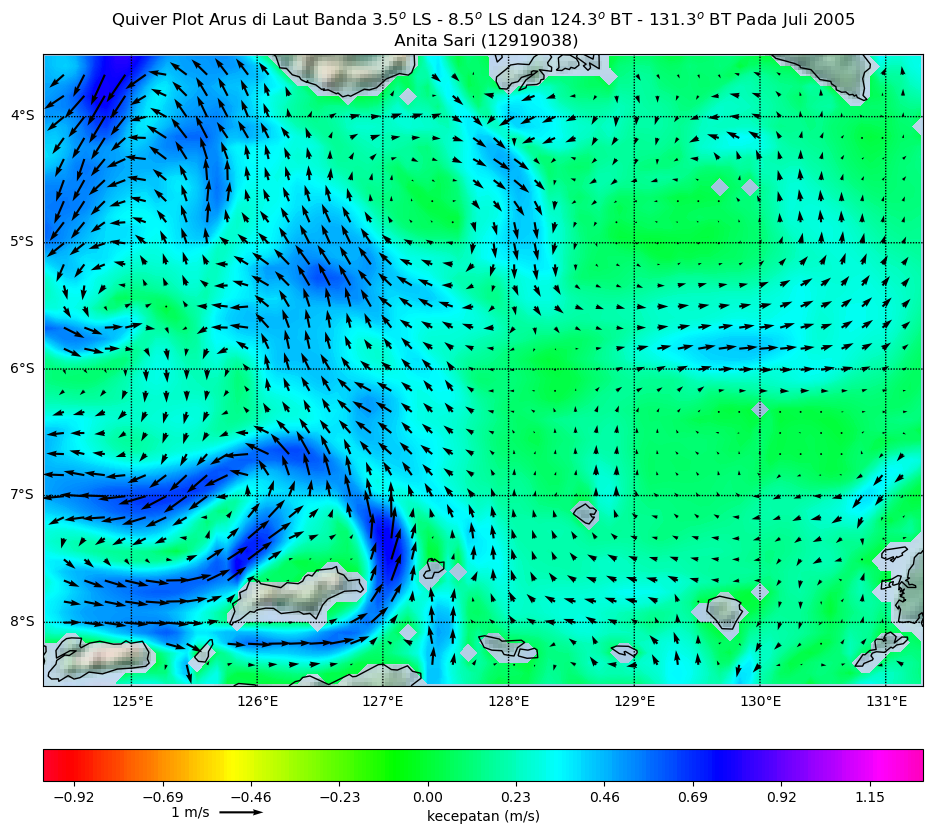

In [57]:
#-- Membuat figure
dpi = 100
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

#-- Membuat map #isi koordinat masing2 yaa
map = Basemap(projection='merc',llcrnrlat= '-8.5' ,urcrnrlat= '-3.5',\
            resolution='i',  llcrnrlon='124.3',urcrnrlon='131.3')

map.shadedrelief()

#-- menggambarkan coastlines, batas wilayah dan negara
map.drawcoastlines()
map.drawstates()
map.drawcountries()

#-- membuat grid
map.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180,180,1),labels=[0,0,0,1],fontsize=10)

#-- mengubah latitute dan longitude menjadi x y 
x, y = map(*np.meshgrid(lon,lat))

#-- contour levels
clevs = np.arange(-1,1.3,0.01) #bisa diubah2 sesuai cakupan data

#-- Countour
cnplot = map.contourf(x,y,var,clevs,cmap=plt.cm.gist_rainbow)

#-- colorbar
cbar = map.colorbar(cnplot,location='bottom',pad="10%")      #-- pad: jarak peta dengan colorbar
cbar.set_label('kecepatan (m/s)')                            #-- Masukan nama colorbar

#-- transformasi vector dan data koordinat, membuat vector
veclon = int(u10.shape[1]/2)                    #-- only every 2nd vector
veclat = int(u10.shape[0]/2)                   #-- only every 2nd vector

uproj,vproj,xx,yy = map.transform_vector(u,v,lonsout2,lat,veclon,veclat,returnxy=True,masked=True)

#-- create vector plot on map
vecplot = map.quiver(xx,yy,uproj,vproj,scale=20)
qk = plt.quiverkey(vecplot, 0.2, -0.2, 1, '1 m/s', labelpos='W')  #legenda quiver, diubah2 berdasarkan cakupan data juga
#JUDUL
plt.title('Quiver Plot Arus di Laut Banda 3.5$^o$ LS - 8.5$^o$ LS dan 124.3$^o$ BT - 131.3$^o$ BT Pada Juli 2005\n Anita Sari (12919038)') #JUDUL UBAH SESUAI DAERAH / menyesuaikan sendiri
plt.show()
#plt.savefig('E:/01 KULIAH/03 SEMESTER 5/ANDAT/PRAKTIKUM/modul4/MODUL 4 ANALISIS DATA 2020/MODUL 4 ANALISIS DATA/Quiver.png',dpi=300)

# Membuat Quiver Plot Arus

In [52]:
#masukin lokasi .nc nya dimana
fn2='C:/Users/USER/Documents/andat/praktikum 1b/Data Angin.nc' 
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds2=nc.Dataset(fn2)
ds2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-10-28 14:41:06 GMT by grib_to_netcdf-2.23.0: grib_to_netcdf /data/scratch/20211028-1440/b5/_mars-webmars-public-svc-green-003-6fe5cac1a363ec1525f54343b6cc9fd8-Q5nD3c.grib -o /data/scratch/20211028-1440/18/_grib2netcdf-webmars-public-svc-green-003-6fe5cac1a363ec1525f54343b6cc9fd8-LmFoUZ.nc -utime
    dimensions(sizes): longitude(57), latitude(41), time(124)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 sst(time,latitude,longitude), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude)
    groups: 

In [53]:
u2=ds2.variables['u10'][0,:,:]
v2=ds2.variables['v10'][0,:,:]
lon2=ds2.variables['longitude'][:]
lat2=ds2.variables['latitude'][:]
time2=ds2.variables['time'][:]
sst2 = ds2.variables['sst'][0,:,:] #kira-kira input sst jadi apanya


#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u2))
print('dimensi v',np.shape(v2))
print('dimensi lon',np.shape(lon2))
print('dimensi lat',np.shape(lat2))
print('dimensi time',np.shape(time2))
print('dimensi sst',np.shape(sst2))

dimensi u (41, 57)
dimensi v (41, 57)
dimensi lon (57,)
dimensi lat (41,)
dimensi time (124,)
dimensi sst (41, 57)


In [54]:
u3, lonsout1 = addcyclic(u2, lon2)
v3, lonsout1 = addcyclic(v2, lon2)
print ("lon[0]: ", lonsout1[0], "lon[-1]: ", lonsout1[-1])
print ("lat[0]: ", lat2[0], "lat[-1]: ", lat2[-1])

lonsout22=(lonsout1[:(len(lonsout1)-1)])
#lat2= lat[::-1] #reverse agar latitude dari kecil ke besar
# print (lonsout22[:])
# print (lat2[:])
lat3=lat2[::-1]

lon[0]:  124.3 lon[-1]:  124.29999
lat[0]:  -3.5 lat[-1]:  -8.5


C:\Users\USER\anaconda3\lib\site-packages\numpy\ma\core.py:3188: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [55]:
print(np.min(sst2))
print(np.max(sst2))

299.3278204174984
301.1312255859375


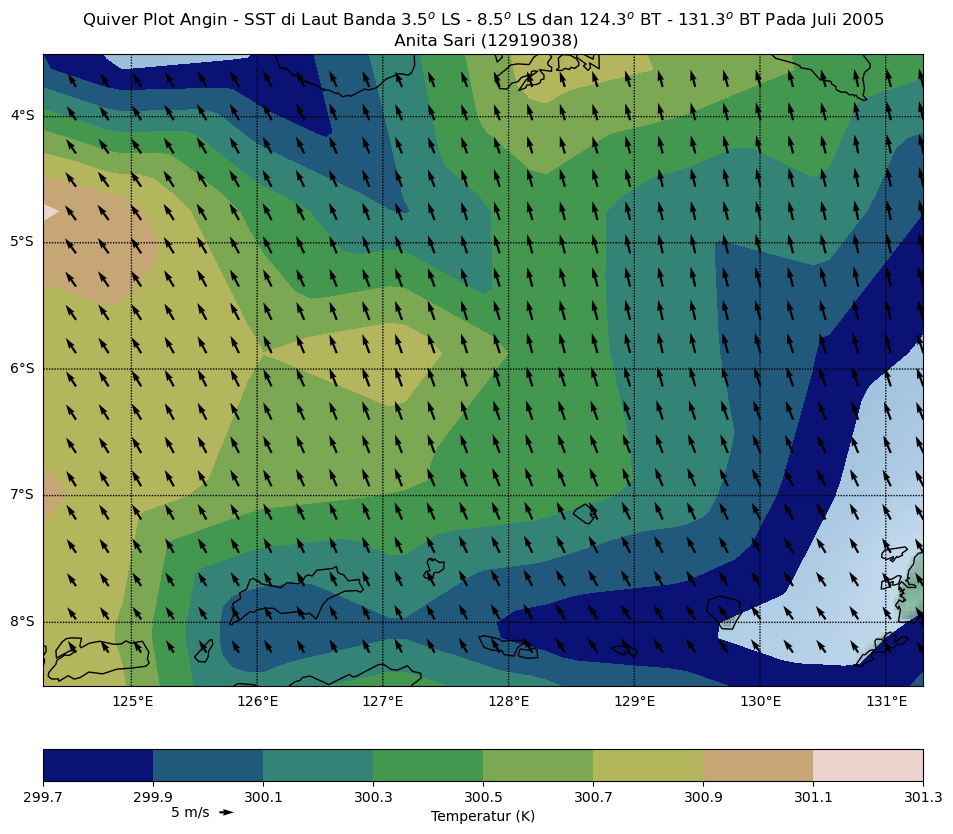

In [58]:
#-- Membuat figure
dpi = 100
fig = plt.figure(figsize=(1100/dpi, 1100/dpi), dpi=dpi)
ax  = fig.add_axes([0.1,0.1,0.8,0.9])

#-- Membuat map #isi koordinat masing2 yaa
map = Basemap(projection='merc',llcrnrlat= -8.5,urcrnrlat= -3.5,\
            resolution='i',  llcrnrlon=124.3,urcrnrlon=131.3)

map.shadedrelief()

#-- menggambarkan coastlines, batas wilayah dan negara
map.drawcoastlines()
map.drawstates()
map.drawcountries()

#-- membuat grid
map.drawparallels(np.arange(-90,90,1),labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180,180,1),labels=[0,0,0,1],fontsize=10)

#-- mengubah latitute dan longitude menjadi x y 
x2, y2 = map(*np.meshgrid(lon2,lat3))

#-- contour levels
clevs2 = np.arange(299.7,301.3,0.2) #bisa diubah2 sesuai cakupan data(data terkecil,data terbesar,loncat)

#-- Countour
cnplot2 = map.contourf(x2,y2,sst2,clevs2,cmap=plt.cm.gist_earth)

#-- colorbar
cbar2 = map.colorbar(cnplot2,location='bottom',pad="10%")      #-- pad: jarak peta dengan colorbar
cbar2.set_label('Temperatur (K)')                            #-- Masukan nama colorbar, kirakira satuannya apa ya dari ecmwf??
#-- transformasi vector dan data koordinat, membuat vector
veclon2 = int(u2.shape[1]/2)                    #-- only every 2nd vector
veclat3 = int(u2.shape[0]/2)                   #-- only every 2nd vector

#ubah lat lon nya disini jadi lonsout3 atau lat3
uproj2,vproj2,xx2,yy2 = map.transform_vector(u3,v3,lonsout22,lat3,veclon2,veclat3,returnxy=True,masked=True)

#-- create vector plot on map
vecplot2 = map.quiver(xx2,yy2,uproj2,vproj2,scale=300) #scale di ubah2 agar panah sesuai (diperbesar menyesuaikan data angin-sst)
qk = plt.quiverkey(vecplot2, 0.2, -0.2, 5, '5 m/s', labelpos='W')  #legenda quiver bisa diubah sesuai kebutuhan
#JUDUL
plt.title('Quiver Plot Angin - SST di Laut Banda 3.5$^o$ LS - 8.5$^o$ LS dan 124.3$^o$ BT - 131.3$^o$ BT Pada Juli 2005\n Anita Sari (12919038)') #JUDUL UBAH SESUAI DAERAH / menyesuaikan sendiri
plt.savefig('Quiver_Angin_SST.png',dpi=600) 